# Experiments for the Eikonal equation in a d-dimensional ball with different sampling distributions

In [1]:
import torch.optim as optim
import matplotlib.pyplot as plt
import torch
import numpy as np
from time import time as t

import sys
# setting path
sys.path.append('../')

from visualization.plots_disc import plot_2d_proj_disc
from Hamiltonians.Eikonal_LxF import Eikonal_sq_LF_multiD
from PointSampling.Ball import data_gen_ball, data_gen_ball_unif
from NeuralNetworks.NNs import FCFF_3L,FCFF_4L

#Right-hand-side of the PDE
def f(X):    
    return 1

#Boundary condition
def g(X):    
    return 0


training_params = {
    'numerical_scheme': Eikonal_sq_LF_multiD,

    'f': f,
    'g': g,
    'c': None,
    
    'beta': 0.,  ## parameter for the +u_i term
    
    'lambda': 1. #weight parameter for the boundary loss
    }

n_experiments_rep = 10

In [2]:
# Dimension of the d-dimensional ball for each experiment
dim_list = 6*[10]
#dim_list = 2*[10]
# Architecture in each experiment
arch_list = 2*[[40,40], 
               [40,40,40], 
               [40,40,40]]
#arch_list = [[40,30], 
#               [40,30,20], 
#               ]
# Sampling distribution: 0 for uniform distribution and 1 for radially uniform distribution
distr_list = 3*[0] + 3*[1]

#distr_list = [0] + [1]

n_experiments = len(dim_list)
radii = [6., 0.]

# Parameters for each experiment
delta_list = [[.7, .3, .1, .01]]*n_experiments
alpha_list = [[2.5, 2., 1., 0.]]*n_experiments
rounds = len(delta_list[0])

N_col_list = [[200]*rounds]*n_experiments
N_b_list = [[80]*rounds]*n_experiments


num_iterations_list = 2*[[500, 500, 500, 500],
                       [500, 500, 500, 500],
                       [500, 1000, 1500, 2000]]
#num_iterations_list = [[3000, 3000, 3000, 3000],
#                       [3000, 3000, 3000, 3000],
#                       ] 

100%|██████████| 500/500 [00:04<00:00, 112.22it/s]
C:\Users\usuario\anaconda3\envs\FD_PINNs\Lib\site-packages\torch\functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\b\abs_e1nmgx0bk6\croot\pytorch-select_1725478824526\work\aten\src\ATen\native\TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


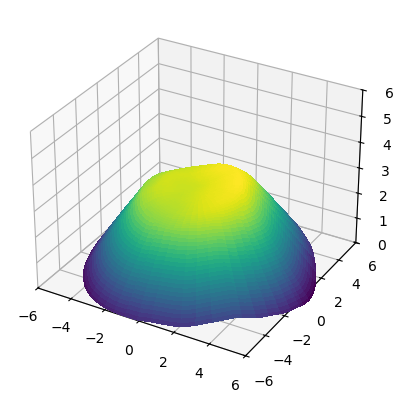

100%|██████████| 500/500 [00:04<00:00, 113.93it/s]


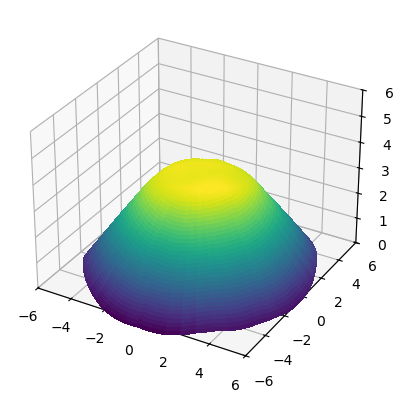

100%|██████████| 500/500 [00:04<00:00, 114.94it/s]


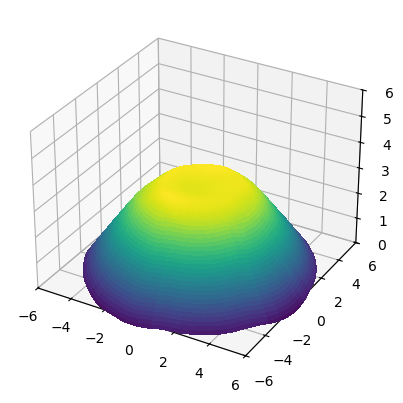

100%|██████████| 500/500 [00:04<00:00, 116.55it/s]


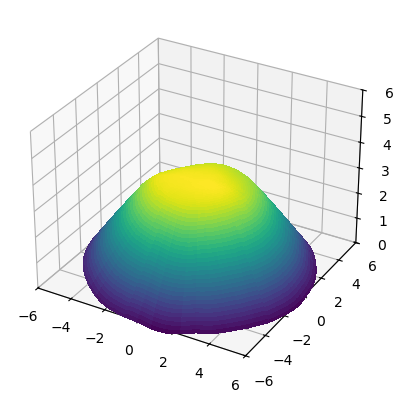

100%|██████████| 500/500 [00:04<00:00, 114.57it/s]


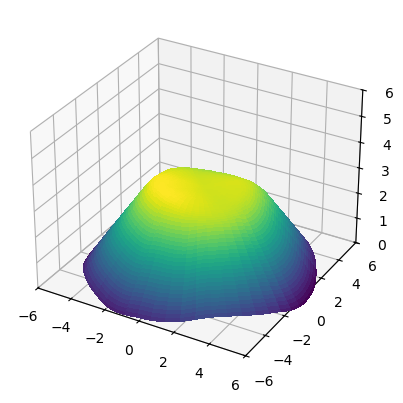

100%|██████████| 500/500 [00:04<00:00, 109.44it/s]


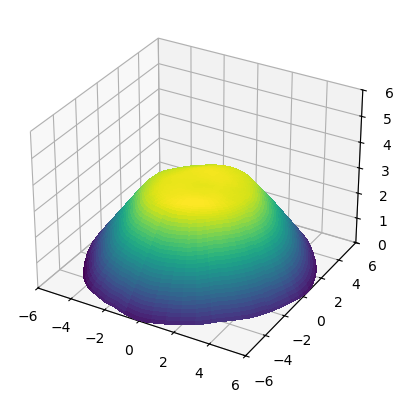

100%|██████████| 500/500 [00:04<00:00, 108.11it/s]


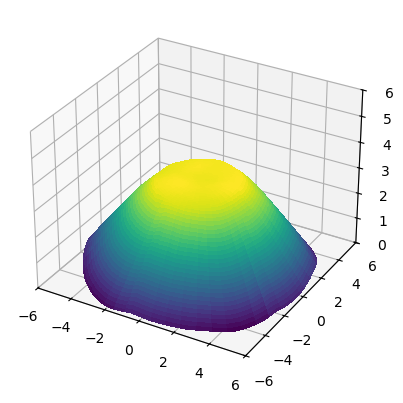

100%|██████████| 500/500 [00:04<00:00, 104.04it/s]


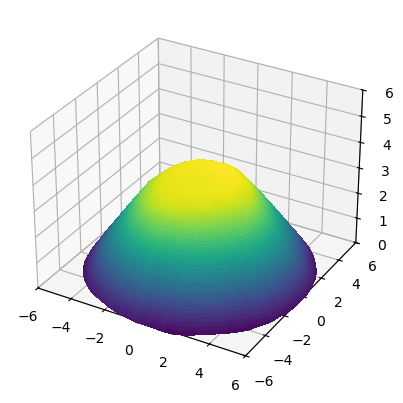

100%|██████████| 500/500 [00:04<00:00, 100.99it/s]


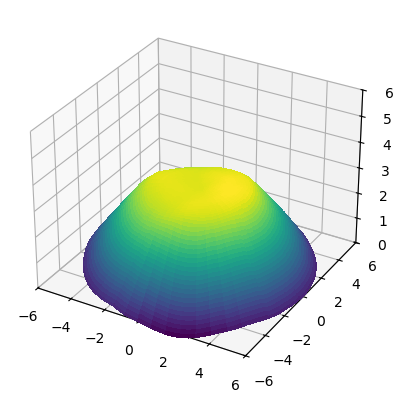

100%|██████████| 500/500 [00:04<00:00, 100.20it/s]


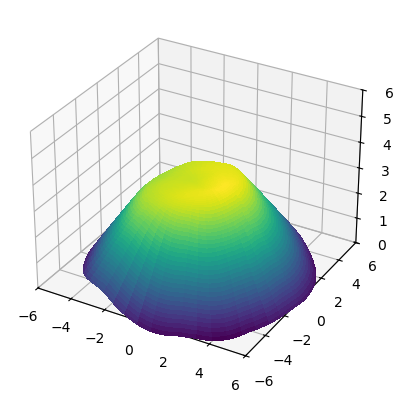

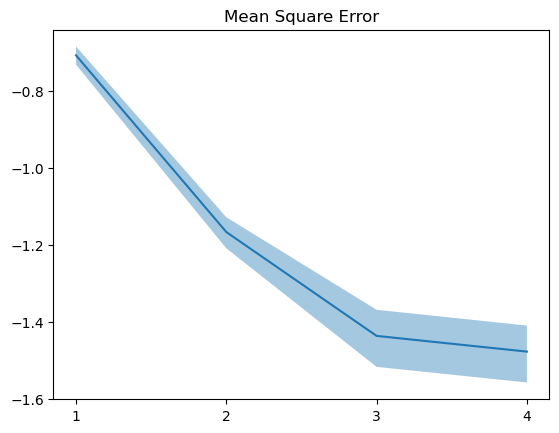

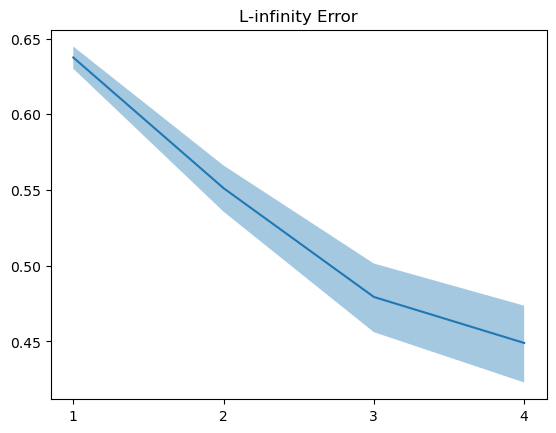

100%|██████████| 500/500 [00:06<00:00, 80.02it/s]


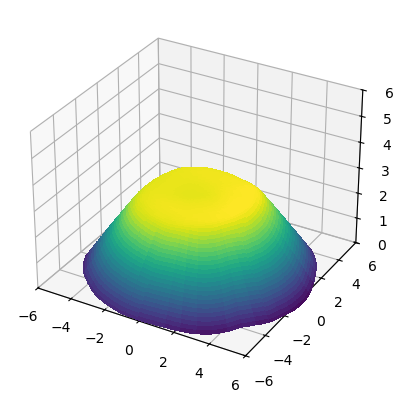

100%|██████████| 500/500 [00:06<00:00, 74.40it/s]


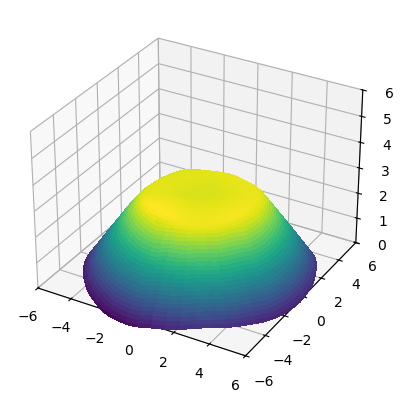

100%|██████████| 500/500 [00:06<00:00, 78.18it/s]


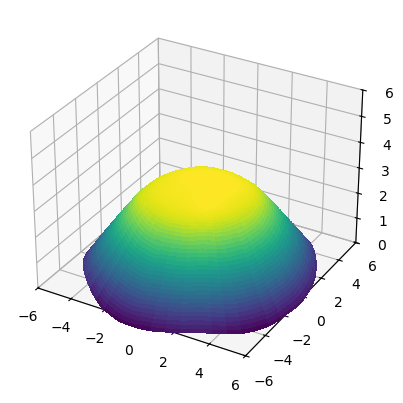

100%|██████████| 500/500 [00:06<00:00, 79.68it/s]


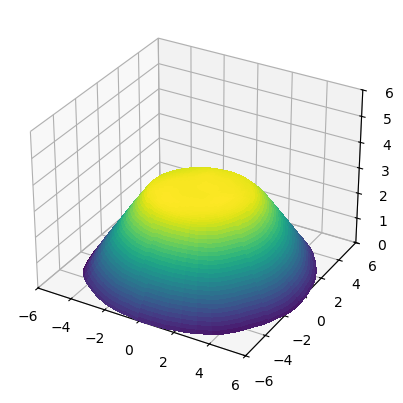

100%|██████████| 500/500 [00:05<00:00, 84.94it/s]


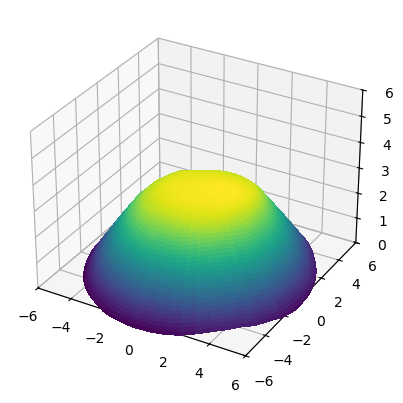

100%|██████████| 500/500 [00:06<00:00, 82.18it/s]


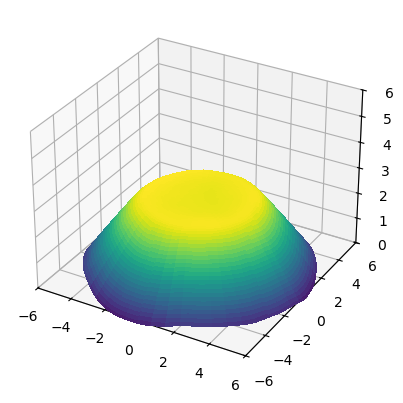

100%|██████████| 500/500 [00:05<00:00, 87.80it/s]


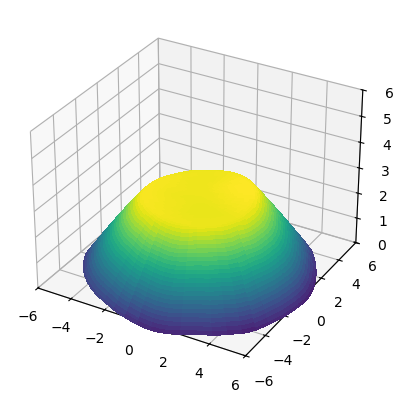

100%|██████████| 500/500 [00:05<00:00, 84.66it/s]


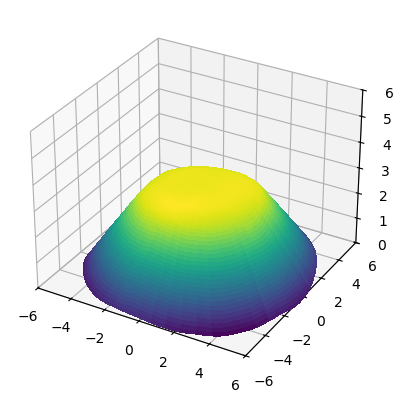

100%|██████████| 500/500 [00:05<00:00, 85.91it/s]


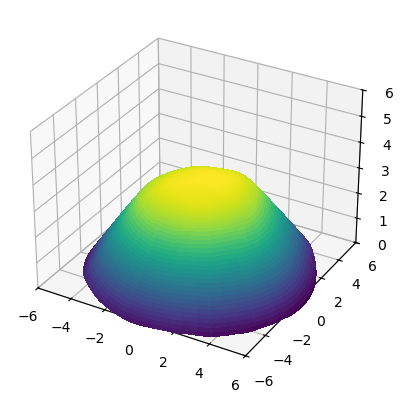

100%|██████████| 500/500 [00:05<00:00, 84.24it/s]


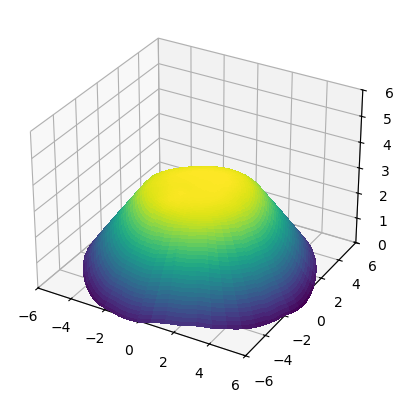

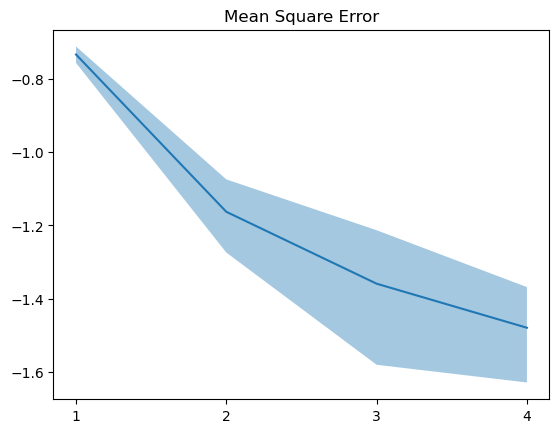

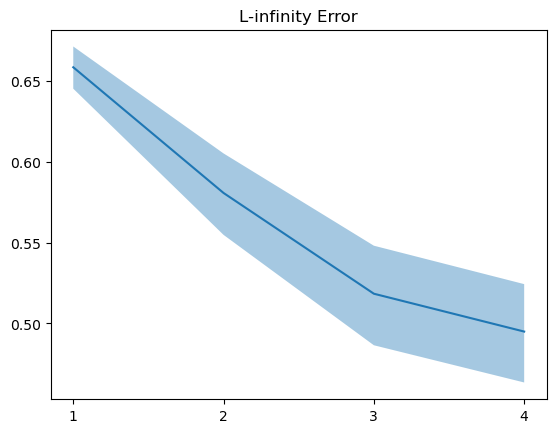

100%|██████████| 2000/2000 [00:25<00:00, 79.96it/s]


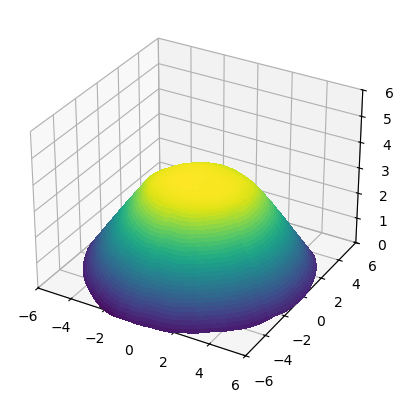

100%|██████████| 2000/2000 [00:26<00:00, 76.76it/s]


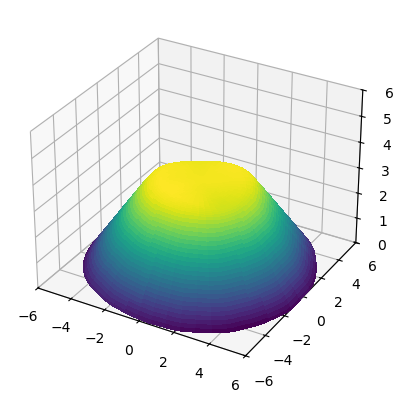

100%|██████████| 2000/2000 [00:26<00:00, 74.86it/s]


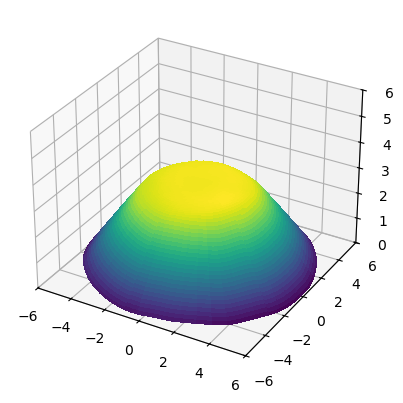

100%|██████████| 2000/2000 [00:23<00:00, 83.88it/s]


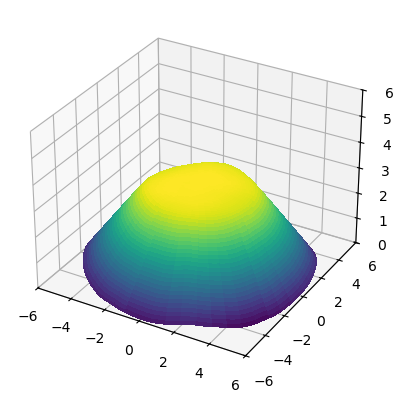

100%|██████████| 2000/2000 [00:23<00:00, 86.37it/s]


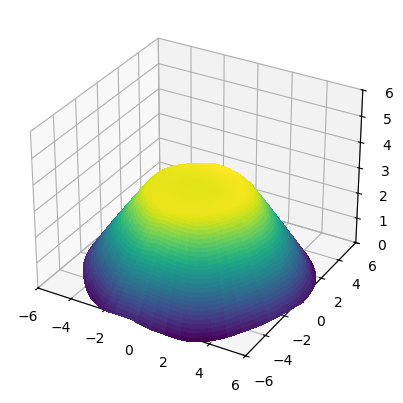

100%|██████████| 2000/2000 [00:23<00:00, 84.47it/s]


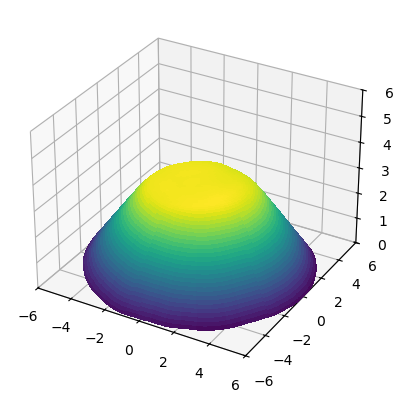

100%|██████████| 2000/2000 [00:25<00:00, 77.53it/s]


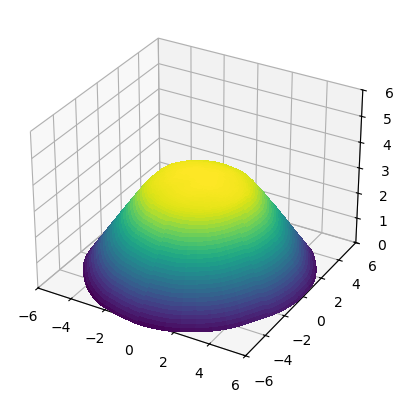

100%|██████████| 2000/2000 [00:25<00:00, 77.10it/s]


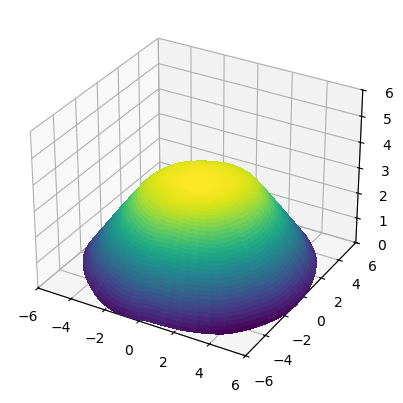

100%|██████████| 2000/2000 [00:24<00:00, 81.46it/s]


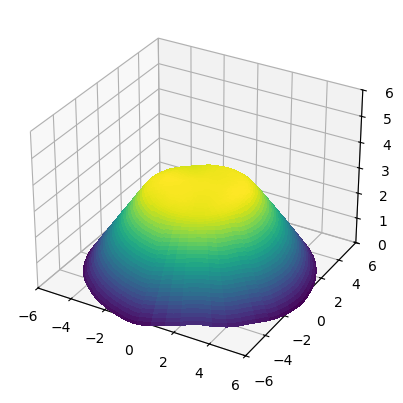

100%|██████████| 2000/2000 [00:24<00:00, 81.40it/s]


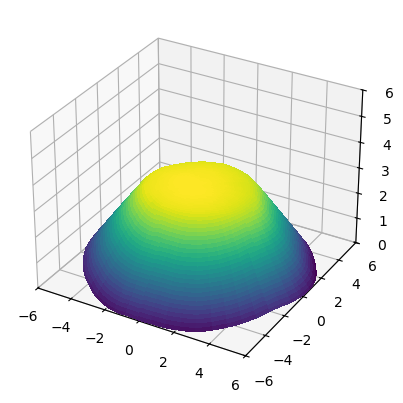

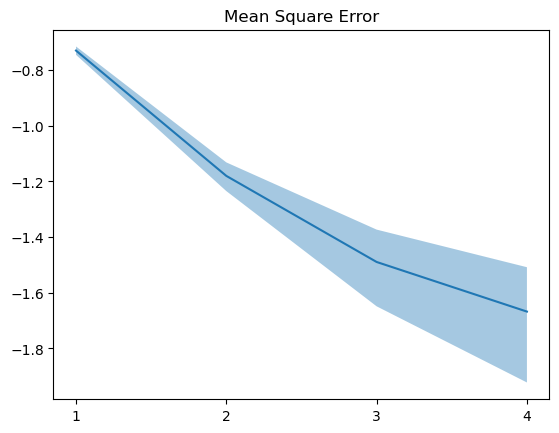

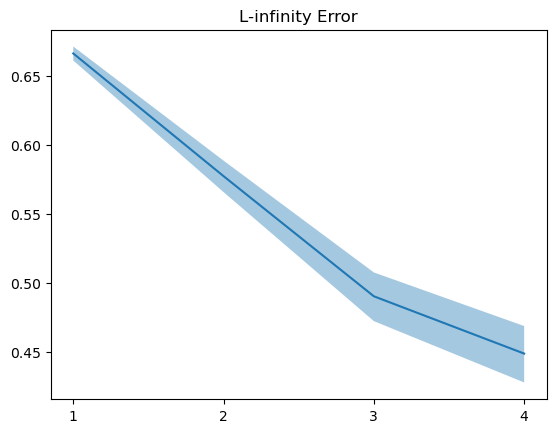

100%|██████████| 500/500 [00:04<00:00, 110.02it/s]


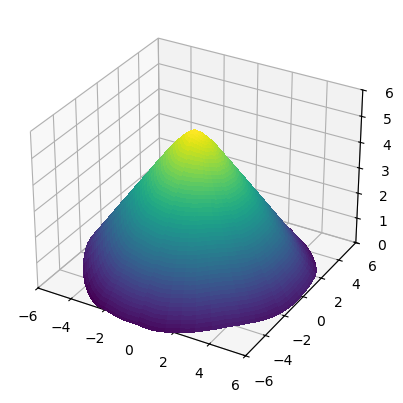

100%|██████████| 500/500 [00:04<00:00, 111.81it/s]


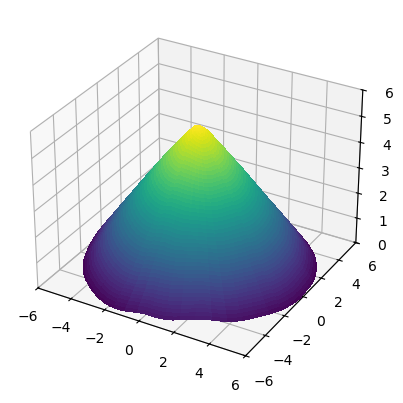

100%|██████████| 500/500 [00:04<00:00, 114.66it/s]


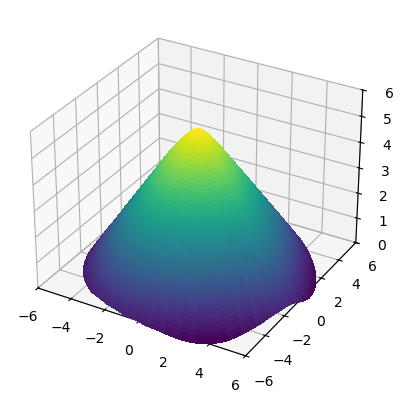

100%|██████████| 500/500 [00:04<00:00, 116.97it/s]


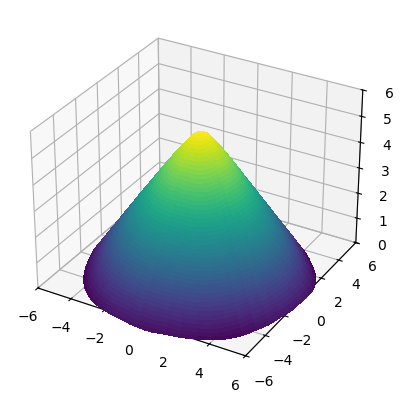

100%|██████████| 500/500 [00:04<00:00, 113.02it/s]


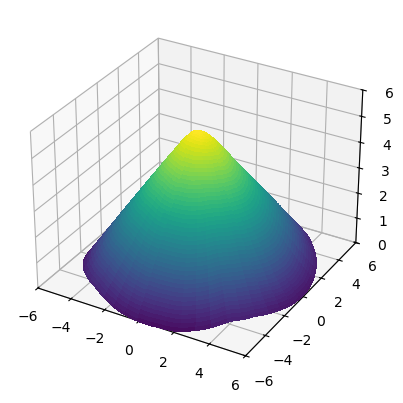

100%|██████████| 500/500 [00:04<00:00, 108.03it/s]


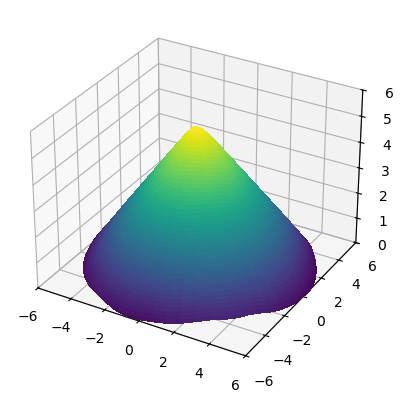

100%|██████████| 500/500 [00:04<00:00, 103.38it/s]


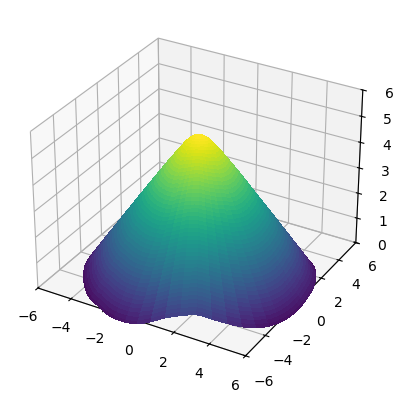

100%|██████████| 500/500 [00:04<00:00, 104.49it/s]


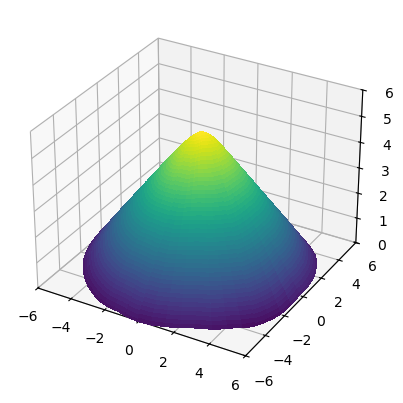

100%|██████████| 500/500 [00:04<00:00, 101.67it/s]


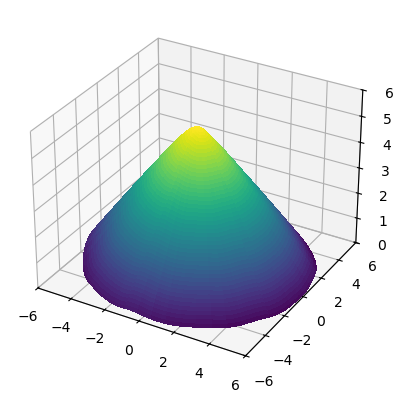

100%|██████████| 500/500 [00:04<00:00, 102.64it/s]


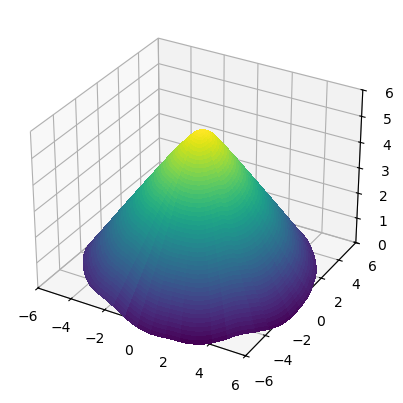

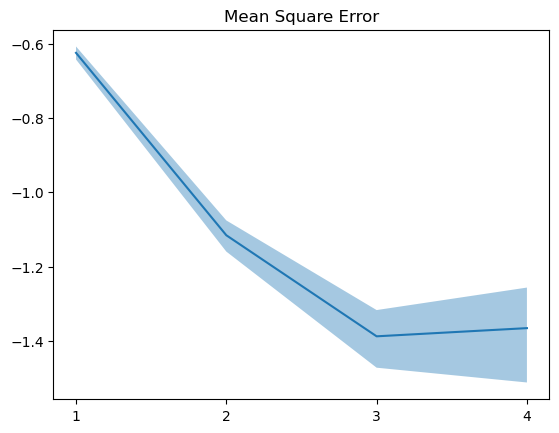

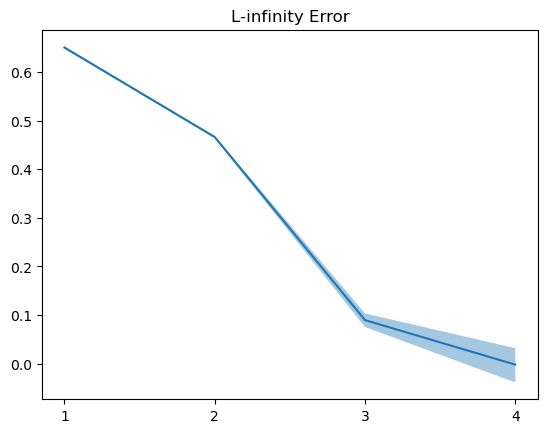

100%|██████████| 500/500 [00:07<00:00, 70.39it/s]


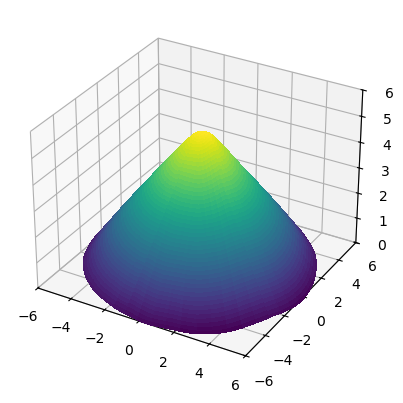

100%|██████████| 500/500 [00:06<00:00, 78.39it/s]


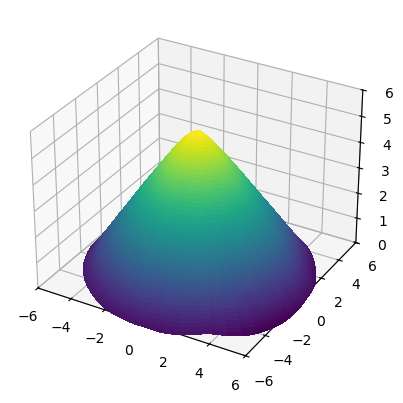

100%|██████████| 500/500 [00:06<00:00, 77.07it/s]


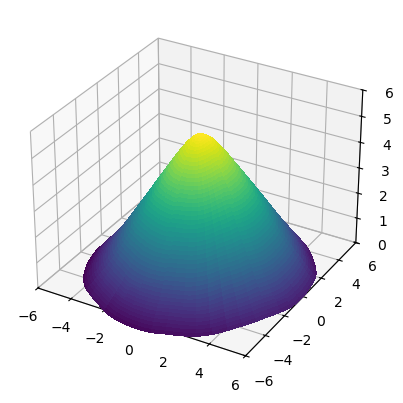

100%|██████████| 500/500 [00:05<00:00, 85.10it/s]


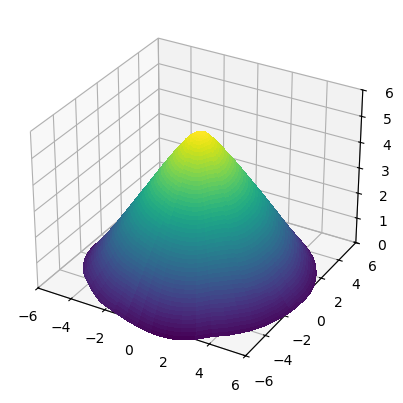

100%|██████████| 500/500 [00:05<00:00, 84.87it/s]


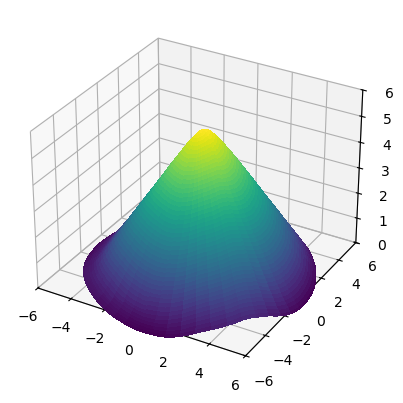

100%|██████████| 500/500 [00:05<00:00, 85.51it/s]


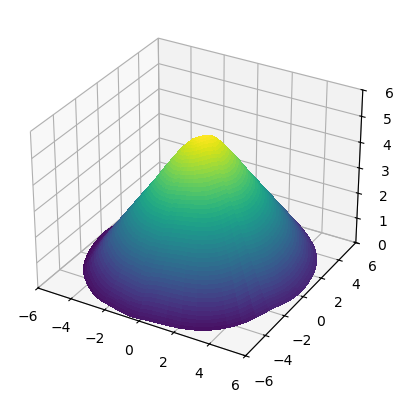

100%|██████████| 500/500 [00:05<00:00, 86.50it/s]


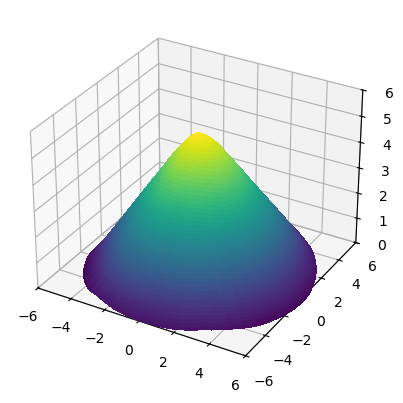

100%|██████████| 500/500 [00:05<00:00, 83.39it/s]


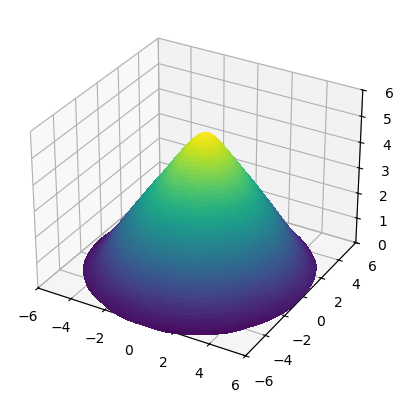

100%|██████████| 500/500 [00:05<00:00, 83.92it/s]


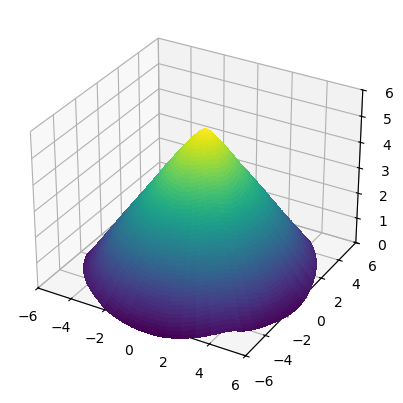

100%|██████████| 500/500 [00:06<00:00, 80.24it/s]


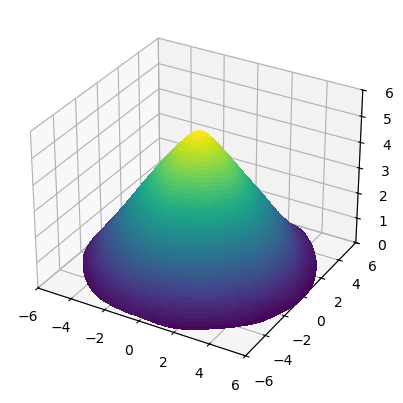

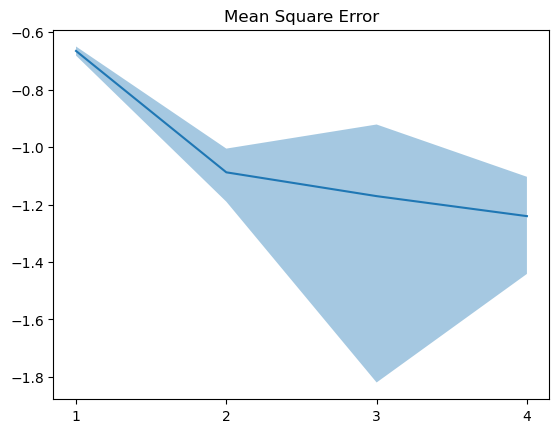

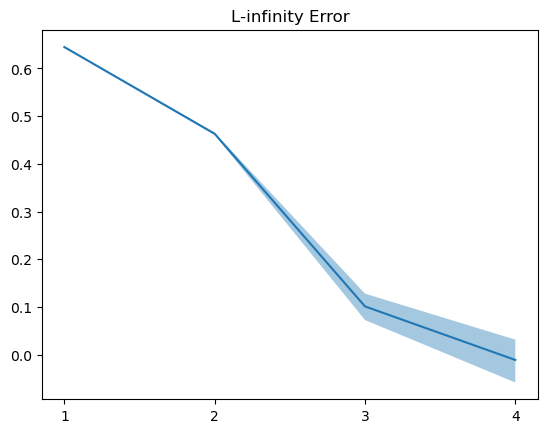

100%|██████████| 2000/2000 [00:25<00:00, 78.75it/s]


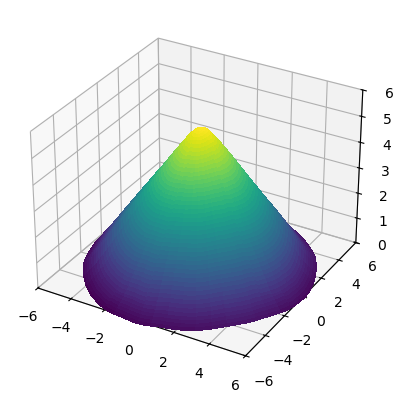

100%|██████████| 2000/2000 [00:26<00:00, 76.32it/s]


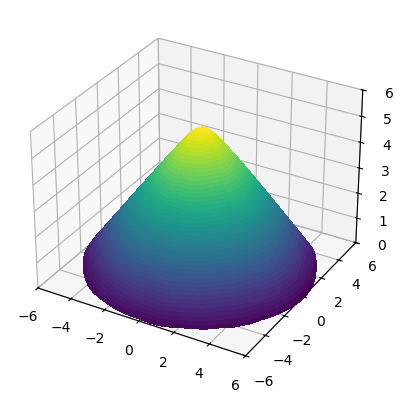

100%|██████████| 2000/2000 [00:25<00:00, 77.44it/s]


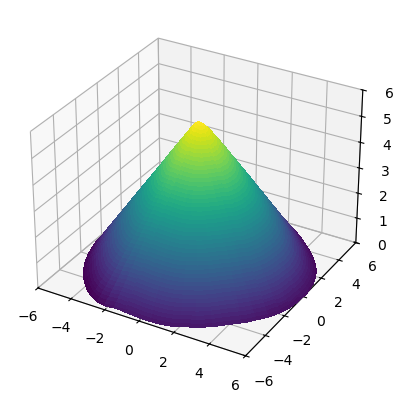

100%|██████████| 2000/2000 [00:24<00:00, 81.08it/s]


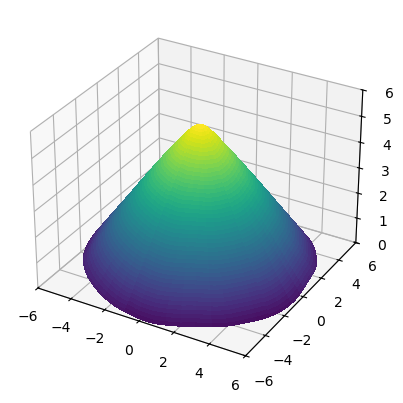

100%|██████████| 2000/2000 [00:23<00:00, 83.50it/s]


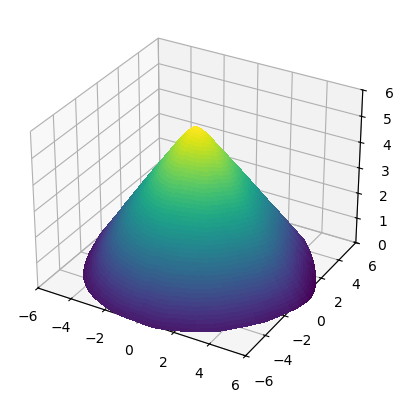

100%|██████████| 2000/2000 [00:25<00:00, 79.90it/s]


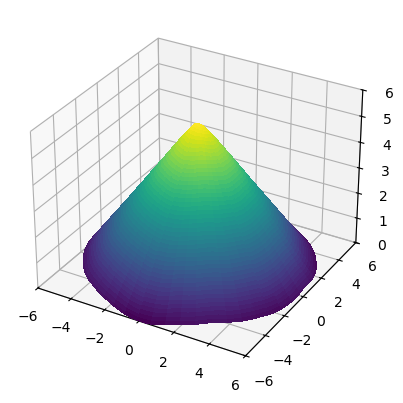

100%|██████████| 2000/2000 [00:27<00:00, 73.10it/s]


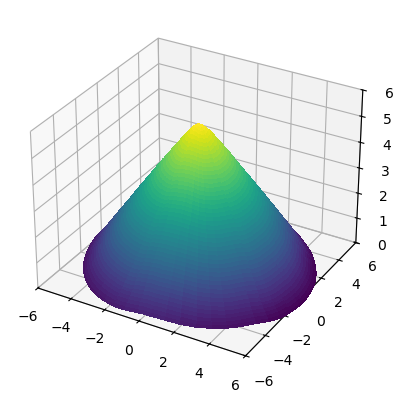

100%|██████████| 2000/2000 [00:30<00:00, 64.55it/s]


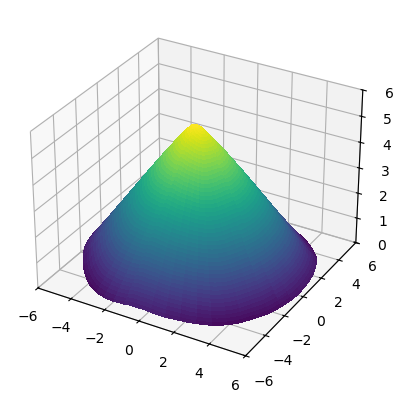

100%|██████████| 2000/2000 [00:26<00:00, 76.71it/s]


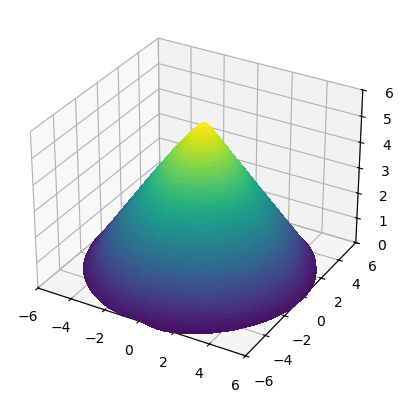

100%|██████████| 2000/2000 [00:24<00:00, 80.13it/s]


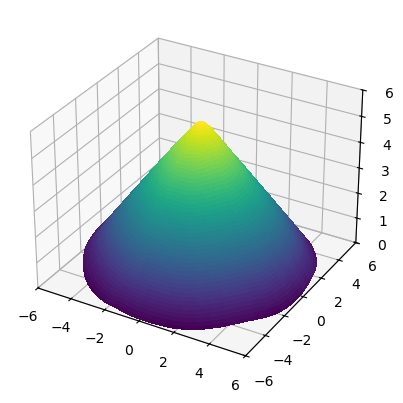

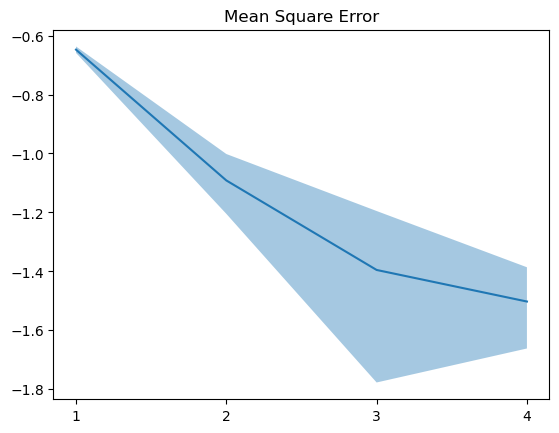

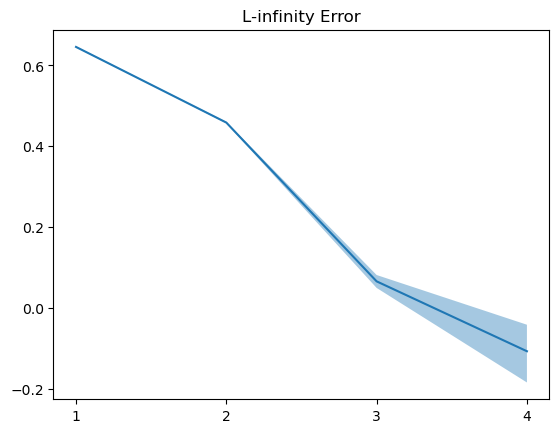

In [3]:
from Training.training import train
from error_test.disc_error import error_ball

MSE_history = torch.zeros([n_experiments, n_experiments_rep, rounds])
L_inf_error_history = torch.zeros([n_experiments, n_experiments_rep, rounds])
run_times = torch.zeros([n_experiments, n_experiments_rep])


for j in range(n_experiments):
        
    for k in range(n_experiments_rep):
        
        if distr_list[j] == 0:
            domain = data_gen_ball_unif(radii, dim_list[j])
        elif distr_list[j] == 1:
            domain = data_gen_ball(radii, dim_list[j])
        else:
            domain == None
        
        if len(arch_list[j]) == 2:        
            NN = FCFF_3L([dim_list[j]] + arch_list[j])
        else:
            NN = FCFF_4L([dim_list[j]] + arch_list[j])
        
        training_params['optimizer'] = optim.SGD(NN.parameters(), lr = .02, momentum = .2)
    
        time = 0.
    
        for i in range(rounds):
    
            training_params['alpha'] = alpha_list[j][i]
            training_params['delta'] = delta_list[j][i]
            
            training_params['n_coloc_points'] = N_col_list[j][i]
            training_params['n_boundary_points'] = N_b_list[j][i]
            training_params['num_iterations'] = num_iterations_list[j][i]
            
            t0 = t()
            total_loss, PDE_loss, boundary_loss = train(NN, domain, training_params)
            time += t() - t0
        
            MC_points = int(1e6) # Number of grid points for comparison with the ground truth
            MSE, L_inf = error_ball(NN, max(radii), MC_points)
        
            MSE_history[j,k,i] = MSE
            L_inf_error_history[j,k,i] = L_inf
    
        run_times[j,k] = time

        axis1 = 0
        axis2 = 1
        n_theta = 100
        n_r = 200
        plot_2d_proj_disc(axis1, axis2, NN, n_theta, n_r, radii)
    
    plt.plot(np.arange(rounds), MSE_history[j].mean(0).log10())
    plt.fill_between(np.arange(rounds),
                     (MSE_history[j].mean(0) - MSE_history[j].std(0)).log10(),
                     (MSE_history[j].mean(0) + MSE_history[j].std(0)).log10(),
                     alpha = .4
                    )
    plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
    plt.title('Mean Square Error')
    plt.show()
    
    plt.plot(np.arange(rounds), L_inf_error_history[j].mean(0).log10())
    plt.fill_between(np.arange(rounds),
                     (L_inf_error_history[j].mean(0) - L_inf_error_history[j].std(0)).log10(),
                     (L_inf_error_history[j].mean(0) + L_inf_error_history[j].std(0)).log10(),
                     alpha = .4
                    )
    plt.xticks([i for i in range(rounds)], [i+1 for i in range(rounds)])
    plt.title('L-infinity Error')
    plt.show()

MSE_average = MSE_history.mean(1)
MSE_std = MSE_history.std(1)

Linf_average = L_inf_error_history.mean(1)
Linf_std = L_inf_error_history.std(1)

run_time_avg = run_times.mean(1) 

In [4]:
run_time_avg = run_times.mean(1) 

import pandas as pd
import numpy as np

distr_list_tab = []

for i in range(len(distr_list)):
    if distr_list[i]==0:
        distr_list_tab.append('Unif.')
    elif distr_list[i]==1:
        distr_list_tab.append('Rad.')
    

training_features = pd.DataFrame({'Dimension': dim_list,
                               'Distribution': distr_list_tab,
                               'Architecture': arch_list,
                               'delta': delta_list,
                               'alpha': alpha_list,
                               'N': N_col_list,
                               'N_b': N_b_list,
                               'Iterations': num_iterations_list})

run_T = pd.DataFrame({'Runtime (s)': np.array(run_time_avg)}).astype('int')

results_MSE = pd.DataFrame(np.array(MSE_average))
results_Linf = pd.DataFrame(np.array(Linf_average))


display('Mean Square Error', training_features.join(results_MSE).join(run_T).transpose())
display('L-infinity Error', training_features.join(results_Linf).join(run_T).transpose())


#One table

MSE = np.array(MSE_history[:,:,-1])
L_inf_error = np.array(L_inf_error_history[:,:,-1])

data_MSE = pd.DataFrame(MSE.transpose())
means_MSE = data_MSE.mean()
stds_MSE = data_MSE.std()

data_Linf = pd.DataFrame(L_inf_error.transpose())
means_Linf = data_Linf.mean()
stds_Linf = data_Linf.std()

summary_df = pd.DataFrame({
    'MSE': means_MSE.round(3).astype(str) + ' ± ' + stds_MSE.round(3).astype(str),
    'L_inf': means_Linf.round(3).astype(str) + ' ± ' + stds_Linf.round(3).astype(str)
})

display(training_features.join(summary_df).join(run_T).transpose())

'Mean Square Error'

0                      1  \
Dimension                        10                     10   
Distribution                  Unif.                  Unif.   
Architecture               [40, 40]           [40, 40, 40]   
delta         [0.7, 0.3, 0.1, 0.01]  [0.7, 0.3, 0.1, 0.01]   
alpha          [2.5, 2.0, 1.0, 0.0]   [2.5, 2.0, 1.0, 0.0]   
N              [200, 200, 200, 200]   [200, 200, 200, 200]   
N_b                [80, 80, 80, 80]       [80, 80, 80, 80]   
Iterations     [500, 500, 500, 500]   [500, 500, 500, 500]   
0                          0.196272               0.184532   
1                          0.068243               0.068724   
2                           0.03668               0.043759   
3                          0.033393               0.033183   
Runtime (s)                      18                     24   

                                    2                      3  \
Dimension                          10                     10   
Distribution                    Unif.                   Rad.   
Architecture             [40, 40, 40]               [40, 40]   
delta           [0.7, 0.3, 0.1, 0.01]  [0.7, 0.3, 0.1, 0.01]   
alpha            [2.5, 2.0, 1.0, 0.0]   [2.5, 2.0, 1.0, 0.0]   
N                [200, 200, 200, 200]   [200, 200, 200, 200]   
N_b                  [80, 80, 80, 80]       [80, 80, 80, 80]   
Iterations    [500, 1000, 1500, 2000]   [500, 500, 500, 500]   
0                            0.186297               0.237701   
1                            0.066057               0.076604   
2                            0.032403               0.040905   
3                            0.021493               0.043036   
Runtime (s)                        62                     18   

                                  4                        5  
Dimension                        10                       10  
Distribution                   Rad.                     Rad.  
Architecture           [40, 40, 40]             [40, 40, 40]  
delta         [0.7, 0.3, 0.1, 0.01]    [0.7, 0.3, 0.1, 0.01]  
alpha          [2.5, 2.0, 1.0, 0.0]     [2.5, 2.0, 1.0, 0.0]  
N              [200, 200, 200, 200]     [200, 200, 200, 200]  
N_b                [80, 80, 80, 80]         [80, 80, 80, 80]  
Iterations     [500, 500, 500, 500]  [500, 1000, 1500, 2000]  
0                          0.216009                 0.225019  
1                          0.081668                  0.08101  
2                          0.067485                 0.040259  
3                          0.057494                 0.031458  
Runtime (s)                      25                       64

'L-infinity Error'

0                      1  \
Dimension                        10                     10   
Distribution                  Unif.                  Unif.   
Architecture               [40, 40]           [40, 40, 40]   
delta         [0.7, 0.3, 0.1, 0.01]  [0.7, 0.3, 0.1, 0.01]   
alpha          [2.5, 2.0, 1.0, 0.0]   [2.5, 2.0, 1.0, 0.0]   
N              [200, 200, 200, 200]   [200, 200, 200, 200]   
N_b                [80, 80, 80, 80]       [80, 80, 80, 80]   
Iterations     [500, 500, 500, 500]   [500, 500, 500, 500]   
0                          4.340543               4.557065   
1                          3.558096               3.808954   
2                          3.015504               3.299161   
3                          2.811737               3.125752   
Runtime (s)                      18                     24   

                                    2                      3  \
Dimension                          10                     10   
Distribution                    Unif.                   Rad.   
Architecture             [40, 40, 40]               [40, 40]   
delta           [0.7, 0.3, 0.1, 0.01]  [0.7, 0.3, 0.1, 0.01]   
alpha            [2.5, 2.0, 1.0, 0.0]   [2.5, 2.0, 1.0, 0.0]   
N                [200, 200, 200, 200]   [200, 200, 200, 200]   
N_b                  [80, 80, 80, 80]       [80, 80, 80, 80]   
Iterations    [500, 1000, 1500, 2000]   [500, 500, 500, 500]   
0                            4.637256                4.46731   
1                            3.778122               2.924584   
2                            3.091466               1.229618   
3                            2.809372               0.995856   
Runtime (s)                        62                     18   

                                  4                        5  
Dimension                        10                       10  
Distribution                   Rad.                     Rad.  
Architecture           [40, 40, 40]             [40, 40, 40]  
delta         [0.7, 0.3, 0.1, 0.01]    [0.7, 0.3, 0.1, 0.01]  
alpha          [2.5, 2.0, 1.0, 0.0]     [2.5, 2.0, 1.0, 0.0]  
N              [200, 200, 200, 200]     [200, 200, 200, 200]  
N_b                [80, 80, 80, 80]         [80, 80, 80, 80]  
Iterations     [500, 500, 500, 500]  [500, 1000, 1500, 2000]  
0                          4.412636                 4.421481  
1                          2.903759                 2.874159  
2                          1.262384                 1.163818  
3                          0.974896                  0.78174  
Runtime (s)                      25                       64

0                      1  \
Dimension                        10                     10   
Distribution                  Unif.                  Unif.   
Architecture               [40, 40]           [40, 40, 40]   
delta         [0.7, 0.3, 0.1, 0.01]  [0.7, 0.3, 0.1, 0.01]   
alpha          [2.5, 2.0, 1.0, 0.0]   [2.5, 2.0, 1.0, 0.0]   
N              [200, 200, 200, 200]   [200, 200, 200, 200]   
N_b                [80, 80, 80, 80]       [80, 80, 80, 80]   
Iterations     [500, 500, 500, 500]   [500, 500, 500, 500]   
MSE                   0.033 ± 0.006           0.033 ± 0.01   
L_inf                 2.812 ± 0.164          3.126 ± 0.219   
Runtime (s)                      18                     24   

                                    2                      3  \
Dimension                          10                     10   
Distribution                    Unif.                   Rad.   
Architecture             [40, 40, 40]               [40, 40]   
delta           [0.7, 0.3, 0.1, 0.01]  [0.7, 0.3, 0.1, 0.01]   
alpha            [2.5, 2.0, 1.0, 0.0]   [2.5, 2.0, 1.0, 0.0]   
N                [200, 200, 200, 200]   [200, 200, 200, 200]   
N_b                  [80, 80, 80, 80]       [80, 80, 80, 80]   
Iterations    [500, 1000, 1500, 2000]   [500, 500, 500, 500]   
MSE                      0.021 ± 0.01          0.043 ± 0.012   
L_inf                   2.809 ± 0.132          0.996 ± 0.081   
Runtime (s)                        62                     18   

                                  4                        5  
Dimension                        10                       10  
Distribution                   Rad.                     Rad.  
Architecture           [40, 40, 40]             [40, 40, 40]  
delta         [0.7, 0.3, 0.1, 0.01]    [0.7, 0.3, 0.1, 0.01]  
alpha          [2.5, 2.0, 1.0, 0.0]     [2.5, 2.0, 1.0, 0.0]  
N              [200, 200, 200, 200]     [200, 200, 200, 200]  
N_b                [80, 80, 80, 80]         [80, 80, 80, 80]  
Iterations     [500, 500, 500, 500]  [500, 1000, 1500, 2000]  
MSE                   0.057 ± 0.021             0.031 ± 0.01  
L_inf                   0.975 ± 0.1            0.782 ± 0.127  
Runtime (s)                      25                       64

In [5]:
display(training_features.join(summary_df).join(run_T).transpose().to_latex())

'\\begin{tabular}{lllllll}\n\\toprule\n & 0 & 1 & 2 & 3 & 4 & 5 \\\\\n\\midrule\nDimension & 10 & 10 & 10 & 10 & 10 & 10 \\\\\nDistribution & Unif. & Unif. & Unif. & Rad. & Rad. & Rad. \\\\\nArchitecture & [40, 40] & [40, 40, 40] & [40, 40, 40] & [40, 40] & [40, 40, 40] & [40, 40, 40] \\\\\ndelta & [0.7, 0.3, 0.1, 0.01] & [0.7, 0.3, 0.1, 0.01] & [0.7, 0.3, 0.1, 0.01] & [0.7, 0.3, 0.1, 0.01] & [0.7, 0.3, 0.1, 0.01] & [0.7, 0.3, 0.1, 0.01] \\\\\nalpha & [2.5, 2.0, 1.0, 0.0] & [2.5, 2.0, 1.0, 0.0] & [2.5, 2.0, 1.0, 0.0] & [2.5, 2.0, 1.0, 0.0] & [2.5, 2.0, 1.0, 0.0] & [2.5, 2.0, 1.0, 0.0] \\\\\nN & [200, 200, 200, 200] & [200, 200, 200, 200] & [200, 200, 200, 200] & [200, 200, 200, 200] & [200, 200, 200, 200] & [200, 200, 200, 200] \\\\\nN_b & [80, 80, 80, 80] & [80, 80, 80, 80] & [80, 80, 80, 80] & [80, 80, 80, 80] & [80, 80, 80, 80] & [80, 80, 80, 80] \\\\\nIterations & [500, 500, 500, 500] & [500, 500, 500, 500] & [500, 1000, 1500, 2000] & [500, 500, 500, 500] & [500, 500, 500, 500] & [

<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
<>:19: SyntaxWarning: invalid escape sequence '\l'
<>:39: SyntaxWarning: invalid escape sequence '\l'
C:\Users\usuario\AppData\Local\Temp\ipykernel_7020\3209648835.py:19: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
C:\Users\usuario\AppData\Local\Temp\ipykernel_7020\3209648835.py:39: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')


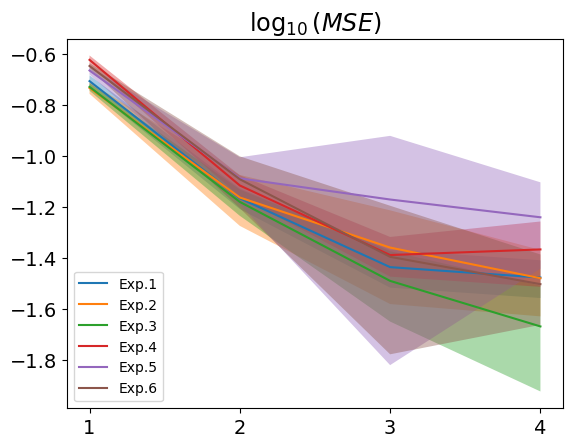

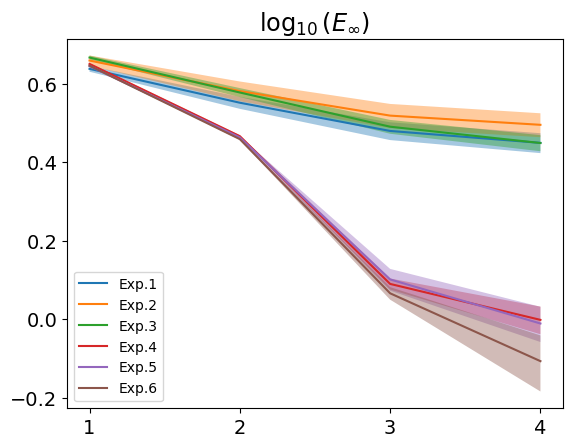

In [6]:
from mpl_toolkits.axes_grid1 import host_subplot

ax = host_subplot(111)
for i in range(MSE_history.shape[0]):
    x = np.arange(rounds) + 1
    
    text = 'Exp.' + str(i+1)
    
    ax.plot(x, 
            MSE_history[i].mean(0).log10(), 
            label = text)
    ax.fill_between(x,
                   (MSE_history[i].mean(0) - MSE_history[i].std(0)).log10(),
                   (MSE_history[i].mean(0) + MSE_history[i].std(0)).log10(),
                   alpha = .4)
    ax.set_xticks(x)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.title('$\log_{10} (MSE)$', fontsize = 'xx-large')
plt.legend()
plt.show()

ax = host_subplot(111)
for i in range(L_inf_error_history.shape[0]):
    L_inf_log10 = torch.log10(L_inf_error_history[i])
    
    text = 'Exp.' + str(i+1)
    
    ax.plot(x,
            L_inf_error_history[i].mean(0).log10(), 
            label = text)
    ax.fill_between(x,
                   (L_inf_error_history[i].mean(0) - L_inf_error_history[i].std(0)).log10(),
                   (L_inf_error_history[i].mean(0) + L_inf_error_history[i].std(0)).log10(),
                   alpha = .4)
    ax.set_xticks(x)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
plt.title('$\log_{10} (E_{\infty})$', fontsize = 'xx-large')
plt.legend()
plt.show()